<a href="https://colab.research.google.com/github/Sunjung-Dev/AtoI-project/blob/main/TEST_SIZE_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install finance-datareader

In [3]:
import FinanceDataReader as fdr 
DF = fdr.DataReader(symbol='005930', start='2020-02-19') # 삼성전자, 2020.02.19~현재
DF

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-02-19,59800,60400,59400,60200,12951496,0.006689
2020-02-20,60700,61300,59600,60000,14591924,-0.003322
2020-02-21,58800,59800,58500,59200,13777393,-0.013333
2020-02-24,57400,58100,56800,56800,25627537,-0.040541
2020-02-25,56200,58000,56200,57900,23885408,0.019366
...,...,...,...,...,...,...
2021-02-15,83800,84500,83300,84200,23529706,0.031863
2021-02-16,84500,86000,84200,84900,20483100,0.008314
2021-02-17,83900,84200,83000,83200,18307735,-0.020024


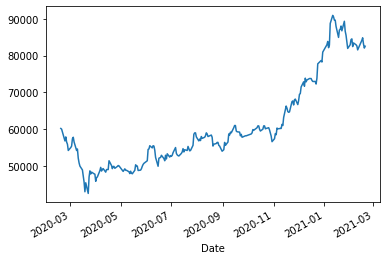

In [4]:
DF['Close'].plot();

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_scaled = scaler.fit_transform(DF[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

         Open      High       Low     Close    Volume
0    0.360587  0.316432  0.362288  0.364948  0.044815
1    0.379455  0.333333  0.366525  0.360825  0.065071
2    0.339623  0.305164  0.343220  0.344330  0.055013
3    0.310273  0.273239  0.307203  0.294845  0.201340
4    0.285115  0.271362  0.294492  0.317526  0.179828
..        ...       ...       ...       ...       ...
244  0.863732  0.769014  0.868644  0.859794  0.175436
245  0.878407  0.797183  0.887712  0.874227  0.137816
246  0.865828  0.763380  0.862288  0.839175  0.110954
247  0.851153  0.752113  0.843220  0.816495  0.148245
248  0.832285  0.737089  0.819915  0.826804  0.199386

[249 rows x 5 columns]


In [5]:

#import numpy as np
#import pandas as pd
#import os

In [6]:
#import os
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
#base_dir = "/content/gdrive/MyDrive"
#file_nm = "DF.xlsx" 
#xlxs_dir = os.path.join(base_dir, file_nm)

In [9]:
#cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [10]:
#xlsx.to_excel('DF.xlsx',index=True)

NameError: ignored

In [12]:
TEST_SIZE = 100

In [13]:
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [14]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [16]:
feature_cols = ['Open', 'High', 'Low', 'Volume']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape
# ((103, 20, 4), (26, 20, 4))



((103, 20, 4), (26, 20, 4))

In [18]:
test_feature = test[['Open', 'High', 'Low', 'Volume']]
test_label = test[label_cols]

test_feature.shape, test_label.shape

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape
#((80, 20, 4), (80, 1))

((80, 20, 4), (80, 1))

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(10, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [20]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
7/7 [==============================] - 1s 65ms/step - loss: 0.0441 - val_loss: 0.0406

Epoch 00001: val_loss improved from inf to 0.04058, saving model to model/tmp_checkpoint.h5
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0384 - val_loss: 0.0337

Epoch 00002: val_loss improved from 0.04058 to 0.03369, saving model to model/tmp_checkpoint.h5
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0321 - val_loss: 0.0275

Epoch 00003: val_loss improved from 0.03369 to 0.02750, saving model to model/tmp_checkpoint.h5
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0248 - val_loss: 0.0218

Epoch 00004: val_loss improved from 0.02750 to 0.02178, saving model to model/tmp_checkpoint.h5
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0193 - val_loss: 0.0166

Epoch 00005: val_loss improved from 0.02178 to 0.01662, saving model to model/tmp_checkpoint.h5
Epoch 6/200
7/7 [==============

In [23]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(80, 1)

In [24]:
from matplotlib import pyplot as plt

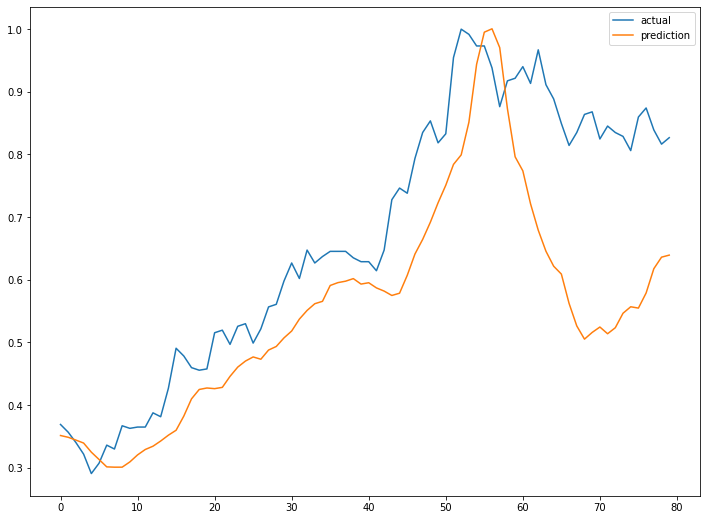

In [25]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()